# TP2 - Régression logistique : Une étoile est-elle un pulsar ?

Issue d'un [dataset](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate) disponible sur Kaggle.

Le dataset pour cette séance correspond à des mesures d'observations d'étoiles pour lesquelles on se pose la question : est-ce un pulsar ? Puisque la réponse est *oui* ou *non*, nous sommes dans le cadre d'un apprentissage supervisé et plus spécifiquement une classification. Nous allons utiliser une régression logistique pour répondre à ce problème.

## Contrôle de la qualité de donnée

Commençons par importer les données et les observer.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pulsar_stars.csv")
df.head(15)

,Mean_ip,Std_ip,Excess_kurtosis_ip,Skewness_ip,Mean_DM,Std_DM,Excess_kurtosis_DM,Skewness_DM,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


Comme nous travaillons avec un problème de classification, on souhaite connaître la proportion de déséquilibre. C'est la proportion d'observation de la classe d'intérêt dans la totalité du dataset.

**Consigne** : calculer la proportion de déséquilibre.

In [2]:
balance = len(df[df['target']==1]) / len(df)
print(balance)

0.09157447759526204


On souhaite avoir une vue rapide du dataset. En exploitant la méthode *describe* on obtient :

In [3]:
df.describe()

,Mean_ip,Std_ip,Excess_kurtosis_ip,Skewness_ip,Mean_DM,Std_DM,Excess_kurtosis_DM,Skewness_DM,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Il ne semble pas y avoir de valeurs aberrantes, mais on souhaite le vérifier. Pour le faire, nous allons tracer la distribution de chacune des colonnes. 

**Consigne** : Ecrire une fonction nommé *plot_column* qui prend en paramètre :
* *df*: un dataset
* *column*: une chaîne de caractère qui correspond au nom de la colonne que l'on va visualiser
Cette fonction a pour objectif d'afficher la distribution de la colonne *column* du dataset *df*.

In [16]:
def plot_column(df, column):
    x_index = [i for i in range(len(df))]
    plt.hist(df[column])
    plt.title(column)
    plt.show()

**Consigne** : Exploiter la fonction *plot_column* pour contrôler qu'il n'y a pas de valeurs aberrante.

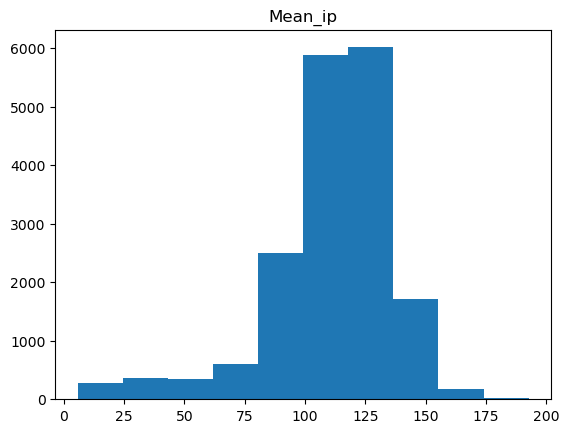

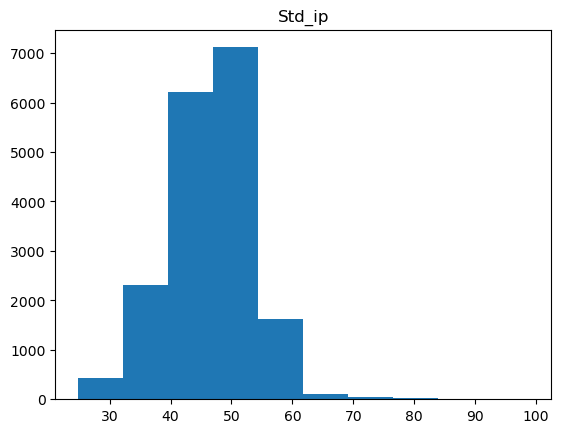

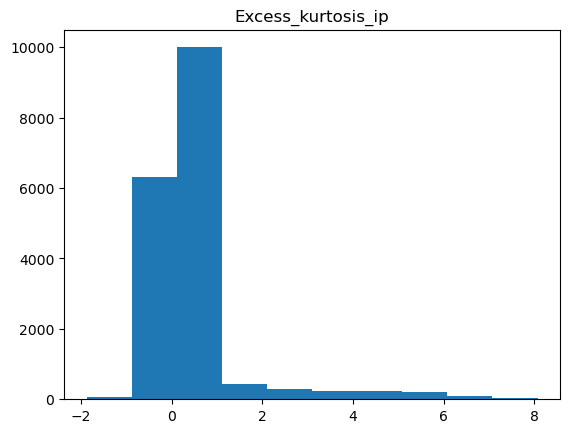

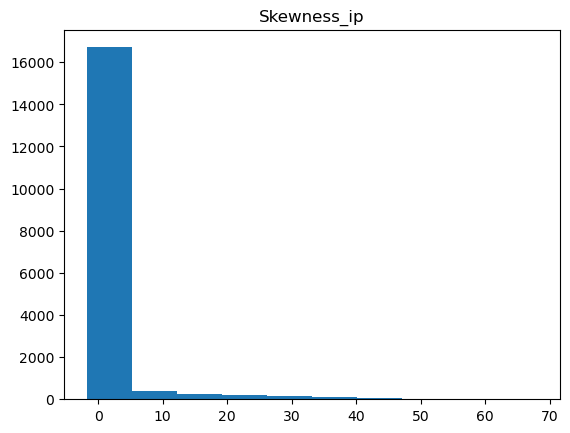

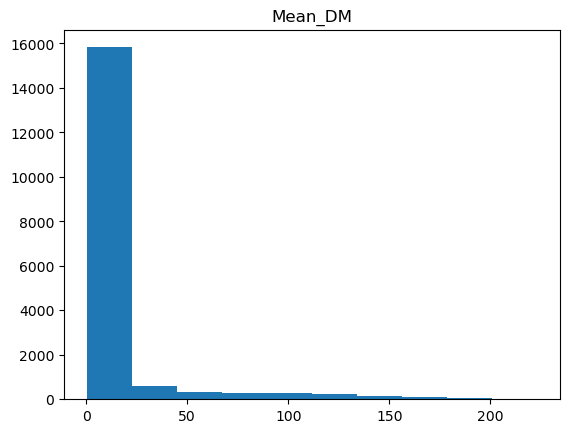

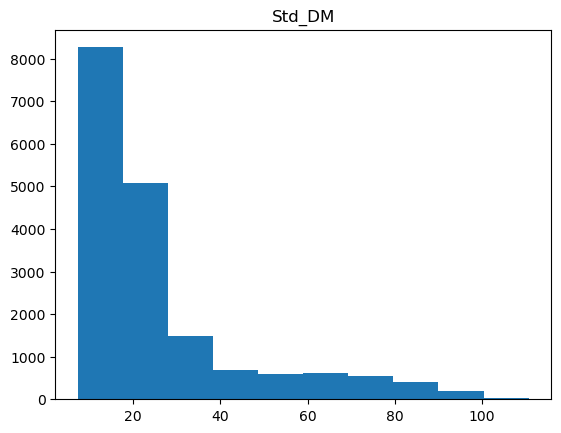

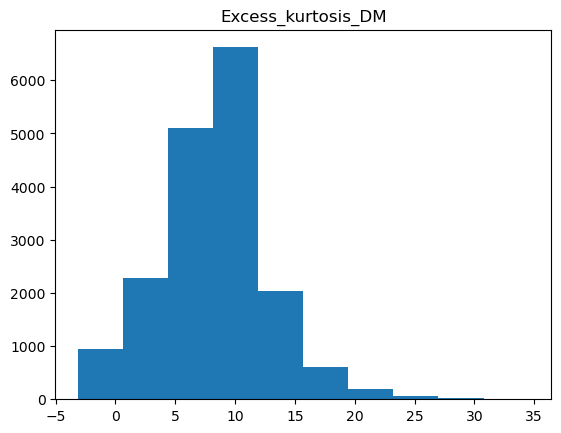

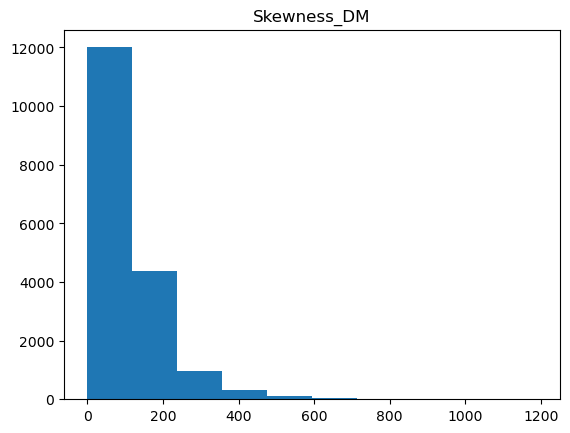

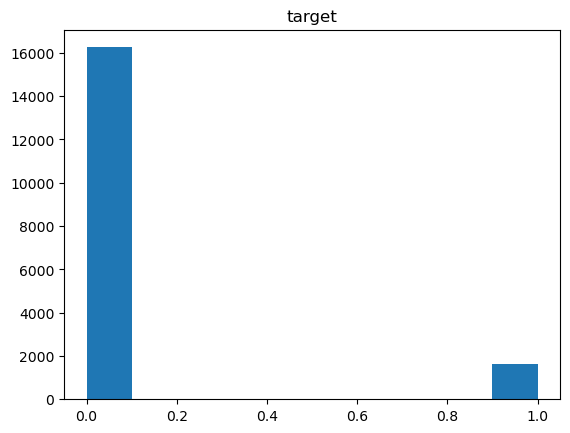

In [17]:
for name in df.columns : 
    plot_column(df, name)

## Modélisation

Pour mesurer la performance de notre future modélisation, nous allons utiliser la validation croisée et plus spécifiquement la fonction [*cross_val_score*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) de scikit-learn.

**Consigne** : Construire une fonction *performance* qui prend en paramètre un vecteur *vector* et qui affiche la moyenne et l'écart-type au format suivant : *moyenne (+/- ecart-type)*

In [19]:
def performance(vector):
    mean = np.mean(vector)
    std = np.std(vector)
    print(mean, "(+/-",std,")")

**Consigne** : réaliser une validation croisée pour la mesure de performance d'une [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). On affichera les performance à l'aide de la fonction *performance*.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = df.drop('target', axis=1, inplace=False)
y = df['target']
logreg = LogisticRegression(max_iter = 100000)
scores = cross_val_score(logreg, X, y, cv=5)
performance(scores)

0.9784332723007113 (+/- 0.002353697870489629 )


Une régression logistique est censée apprendre la probabilité d'appartenance à la classe d'intérêt. Nous avons donc accès à plusieurs *seuil*. Concrètement, en choisissant un seuil différent de 0.5 (celui par défaut), nous pouvons obtenir avec le même modèle plusieurs prédictions différentes. Nous souhaitons mesurer cela.

**Consigne** : Couper le dataset *df* en une base d'entraînement et une base de test. On utilisera le paramètre *stratify* de la fonction [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
y_test

4425     0
1        0
16392    0
13969    0
14271    0
        ..
9878     0
5540     0
10195    0
1339     0
14864    0
Name: target, Length: 3580, dtype: int64

**Consigne** : Entraîner la régression logistique sur la base d'entraînement puis prédire les probabilités d'appartenance à la classe d'intérêt pour la base de test.

In [51]:
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.00230012, 0.01867104, 0.00215902, ..., 0.00810559, 0.0003035 ,
       0.02500697])

**Consigne** : calculer la performance pour les seuils 0.1, 0.5 et 0.9.

In [55]:
import sklearn.metrics as metrics
seuils = [0.1, 0.5, 0.9]

for seuil in seuils :
    y_pred = y_pred_prob[:,1] > seuil
    prec = "{:.2f}".format(metrics.precision_score(y_test, y_pred))
    recall = "{:.2f}".format(metrics.recall_score(y_test,y_pred))
    f1 = "{:.2f}".format(metrics.f1_score(y_test,y_pred))
    print("Seuil",seuil)
    print("Précision",prec,"Recall",recall,"F1-Score",f1)

Seuil 0.1
Précision 0.78 Recall 0.92 F1-Score 0.84
Seuil 0.5
Précision 0.95 Recall 0.83 F1-Score 0.88
Seuil 0.9
Précision 0.98 Recall 0.71 F1-Score 0.83


On souhaite visualiser les courbes de performances selon la valeur du seuil choisi. On souhaite mesurer la performance selon plusieurs métriques :
* La [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
* Le [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
* Le [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

**Consigne** : Construire une fonction *plot_metrics* qui prends en paramètre :
* *y_proba* : un vecteur de probabilité d'appartenance à la classe d'intérêt
* *y_true* : un vecteur qui correspond aux valeurs que l'on doit prédire
Elle tracera pour plusieurs seuil (on pourra utiliser la fonction *np.linspace*) la performance pour ces trois métriques.

In [87]:
def plot_metrics(y_proba,y_test):
    seuils = np.linspace(0.01, 0.99, num=100)
    Prec_list=[]
    Rec_list=[]
    F1_list=[]
    for seuil in seuils:
        y_pred = y_proba[:,1] >= seuil
        prec = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test,y_pred)
        f1 = metrics.f1_score(y_test,y_pred)
        Prec_list.append(prec)
        Rec_list.append(recall)
        F1_list.append(f1)
    plt.plot(seuils,Prec_list,label = 'Precision')
    plt.plot(seuils, Rec_list, label = 'Recall')
    plt.plot(seuils, F1_list, label = 'F1-Score')
    plt.title("Metrics")
    plt.legend()
    plt.show()

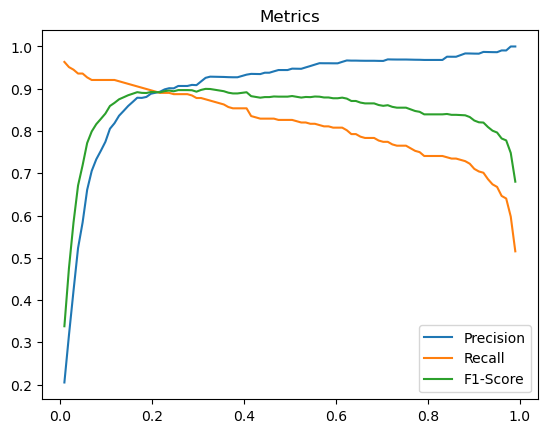

In [88]:
plot_metrics(y_pred_prob,y_test)

## Régularisations

Par défaut, l'implémentation de la [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) dans scikit-learn utilise la régularisation $\mathcal{L}_2$.

**Consigne** : Entrainer une régression logitisque sans aucune régularisation.

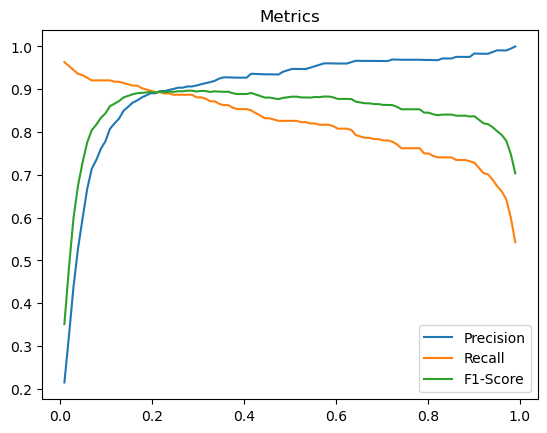

In [95]:
logreg=LogisticRegression(penalty = None, max_iter = 100000)
logreg.fit(X_train,y_train)
y_pred_proba_l2 = logreg.predict_proba(X_test)
plot_metrics(y_pred_proba_l2,y_test)

On cherche à mesurer l'impact de la régularisation $\mathcal{L}_2$ sur la qualité de prédiction. 

**Consigne** : Entraîner plusieurs régression logisitique en faisant varier la force de la régularisation.

In [100]:
from sklearn.metrics import make_scorer
C_list = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
for force in C_list :
    logreg=LogisticRegression(C=force, max_iter = 100000)
    scores = cross_val_score(logreg, X, y, cv=5, scoring = make_scorer(metrics.f1_score)).mean()
    print(f"C={force} : {scores:.2f}")

C=1e-05 : 0.80
C=0.0001 : 0.83
C=0.001 : 0.84
C=0.01 : 0.84
C=0.1 : 0.86
C=1 : 0.87
C=10 : 0.88
C=100 : 0.88
C=1000 : 0.88


## Bonus
1. Fonction pour trouver le seuil optimal selon le f1-score
2. Fonction de visualisation de l'impact de la régularisation
3. Généralisation à d'autre forme de régularisation 

In [ ]:
def seuil_optimal():
    seuils = np.linspace(0.01, 0.99, num=100)
    